#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

# 
# Boston Symphony Orchestra
#### Entity ID : 646cd5c9-e37f-4009-9daa-8d055f47c5af

In [2]:
entity_id = '646cd5c9-e37f-4009-9daa-8d055f47c5af'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
75839,646cd5c9-e37f-4009-9daa-8d055f47c5af,Boston Symphony Orchestra,NaN,True,NaN,NaN,99.0


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
75839,22913,6332,1842,1,3,1


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
3065,2018-09-15 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Boston Symphony Orchestra / Andris Nelsons,NaN,Europe
4137,2018-09-16 16:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Boston - Andris Nelsons,NaN,Europe
5023,2015-09-03 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Boston Symphony Orchestra,NaN,Europe
6825,1963-01-21 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Mon...",NaN,North America
6826,1947-04-01 00:00:00.000000,"Sanders Theatre, Harvard University, Cambridge",United States,NaN,"Boston Symphony Orchestra concert program, Tri...",NaN,North America
6828,1931-04-06 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, You...",NaN,North America
6829,1931-04-07 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, You...",NaN,North America
6830,1947-02-04 00:00:00.000000,"Sanders Theatre, Harvard University, Cambridge",United States,NaN,"Boston Symphony Orchestra concert program, Tri...",NaN,North America
6831,1935-04-16 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Tue...",NaN,North America
6832,1930-01-21 00:00:00.000000,"E. F. Albee Theatre, Providence",United States,NaN,"Boston Symphony Orchestra concert program, Tri...",NaN,North America


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
725,Bohuslav Martinu,SYMPHONY NO. 3,15
856,George Handel,LARGO FROM 'SERSE',15
925,Dmitri Chostakovitch,Symphonie n° 10,7
1114,Richard Wagner,OVERTURE TO RIENZI,15
1414,Gustav Mahler,Symphonie n° 3,7
1666,Antonin Dvorák,SYMPHONY NO. 7,15
1746,Richard Strauss,Don Quichotte,7
1905,Cyril Scott,TWO PASSACAGLIAS,15
2373,Gioachino Rossini,OVERTURE TO L'ITALIANA IN ALGERI,15
2374,Wolfgang Mozart,"SYMPHONY NO. 38 IN D, K.504, PRAGUE",15


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
13286,Steve Reich's Four Organs,https://www.gramophone.co.uk/features/article/...,Steve Reich's Four Organs
13754,Britten's War Requiem,https://www.gramophone.co.uk/features/article/...,Britten's War Requiem
16083,Knoxville: Summer of 1915,https://www.gramophone.co.uk/features/article/...,Knoxville: Summer of 1915
16202,February 2011 reviews,https://www.gramophone.co.uk/features/article/...,February 2011 reviews
17555,"MusicBoston Symphony Orchestra/Levine, Symphon...",https://www.ft.com/content/7aced680-f792-11dd-...,"Boston Symphony Orchestra/Levine, Symphony Hal..."
17620,MusicBoston Symphony Orchestra/LevineDecember ...,https://www.ft.com/content/d361cb5a-c6cc-11dd-...,Boston Symphony Orchestra/Levine
17623,ReviewMusicBoston and Birmingham orchestras se...,https://www.ft.com/content/2df74ceb-8bd5-4ce2-...,Boston and Birmingham orchestras seek a wider ...
17624,ReviewMusicEdinburgh International Festival — ...,https://www.ft.com/content/b0e40e13-05f5-4728-...,Edinburgh International Festival — classical c...
17625,MusicConcerts online are here to stay — but ca...,https://www.ft.com/content/3e46aad1-6d84-48ee-...,Concerts online are here to stay — but can it ...
17626,ReviewMusicTanglewood and Santa Fe festivals g...,https://www.ft.com/content/f014fc2b-ed9e-4cbf-...,Tanglewood and Santa Fe festivals give a taste...


In [8]:
# One example of media mentions
if len(df_medias) > 0 : 
    df_medias.iloc[2].comparable_text

## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date
4940,4341.0,21.0,476.0,82.0,NaN,2015-10-01
4941,3621.0,21.0,375.0,102.0,NaN,2015-11-01
4942,5288.0,16.0,675.0,122.0,NaN,2015-12-01
4943,4491.0,23.0,548.0,146.0,NaN,2016-01-01
4944,3866.0,15.0,431.0,141.0,NaN,2016-02-01


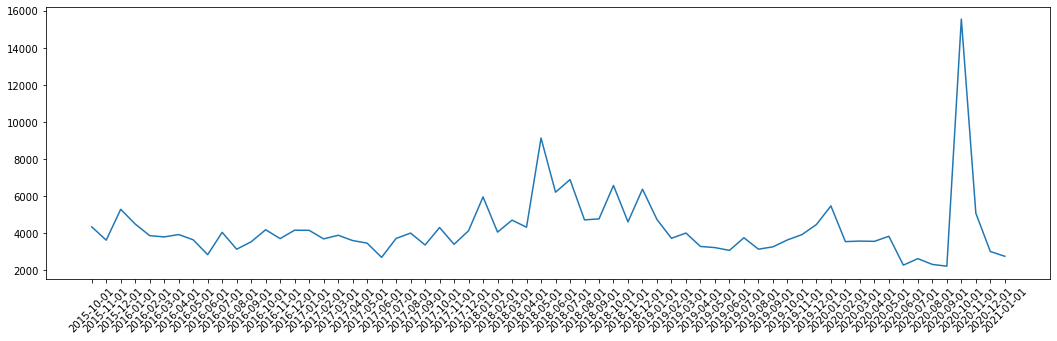

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
26,Orchestra


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['boston symphony orchestra',
  'boston symphony',
  'the boston symphony orchestra']]

## 7 - Biographies 

In [13]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source
25954,The Boston Symphony Orchestra presents more th...,2018,11


In [20]:
# One biography example 
if df_bios.shape[0] > 0 : 
    print(df_bios.iloc[0].detail)

The Boston Symphony Orchestra presents more than 250 concerts annually at Symphony Hall, Tanglewood, and Carnegie Hall, as well as throughout the United States, Europe and Asia. Starting in the 2004-2005 season, James Levine joined the Boston Symphony Orchestra as Music Director, succeeding Seiji Ozawa who lead the orchestra for more than 28-years.
